In [4]:
import os
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_content(pattern, path=".", verbose=True):
    files = os.listdir(path)
    if isinstance(pattern, str):
        matches = [x for x in files if pattern in x]
    elif isinstance(pattern, list):
        if len(pattern) == 2:
            matches = [x for x in files if pattern[0] in x and pattern[1] in x]
        else:
            return "Give 2 patterns at most"
    if verbose:
        print(f"Found {len(matches)} matches: {matches}")
    name = matches[0]
    if name.endswith("npy"):
        return np.load(path+"/"+name)
    elif name.endswith("pickle"):
        with open(path+"/"+name, "rb") as f:
            return pickle.load(f)

def plot_lists(lists, legend=[], 
                legend_title="",
                figsize=(14,6), 
                subplots=(1,1),
                ax=None,
                ):
    if not ax:
        _, ax = plt.subplots(*subplots, figsize=figsize)
    [ax.plot(x) for x in lists]
    ax.legend(legend, title=legend_title)
    return ax


In [5]:
train_loss = {}
val_loss = {}
train_metrics = {}
val_metrics = {}
duration = {}

grid = [16,32,48,64,80,96,112,128,144,160]
for i in grid:
    prefix = f"{i}"
    path = "."
    verbose = False
    val_loss[prefix] = get_content([f"ed{prefix}","val_losses"], path=path, verbose=verbose)
    train_loss[prefix] = get_content([f"ed{prefix}","train_losses"], path=path, verbose=verbose)
    val_metrics[prefix] = get_content([f"ed{prefix}","val_metrics"], path=path, verbose=verbose)
    train_metrics[prefix] = get_content([f"ed{prefix}","train_metrics"], path=path, verbose=verbose)
    duration[prefix] = get_content([f"ed{prefix}","duration"], path=path, verbose=verbose)

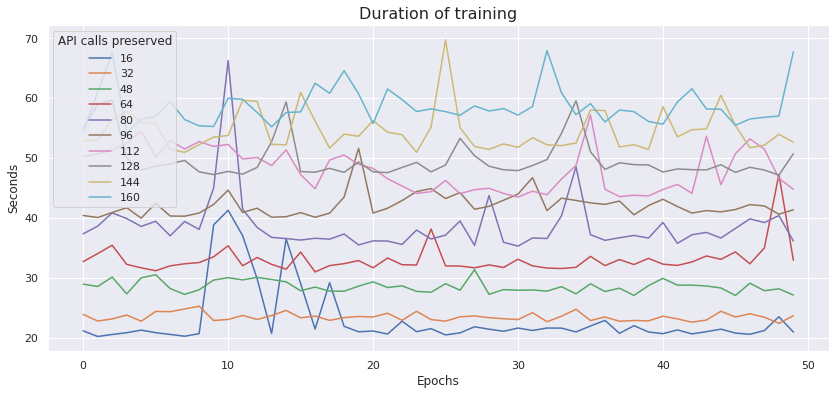

In [6]:
legend_title = "API calls preserved"

ax = plot_lists([duration[x] for x in duration.keys()], 
                legend_title=legend_title,
                legend=list(duration.keys()))
ax.set_title("Duration of training", fontsize=16)
ax.set_xlabel("Epochs")
_ = ax.set_ylabel("Seconds")

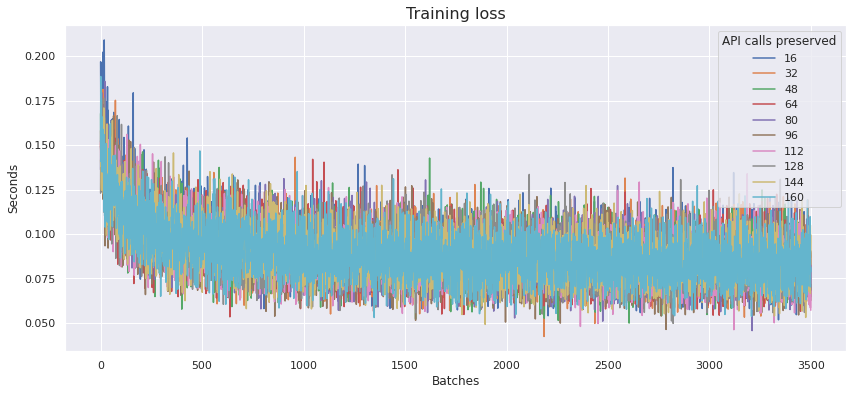

In [7]:
ax = plot_lists([train_loss[x][50:] for x in train_loss.keys()], 
                legend_title=legend_title,
                legend=list(train_loss.keys()))
ax.set_title("Training loss", fontsize=16)
ax.set_xlabel("Batches")
_ = ax.set_ylabel("Seconds")

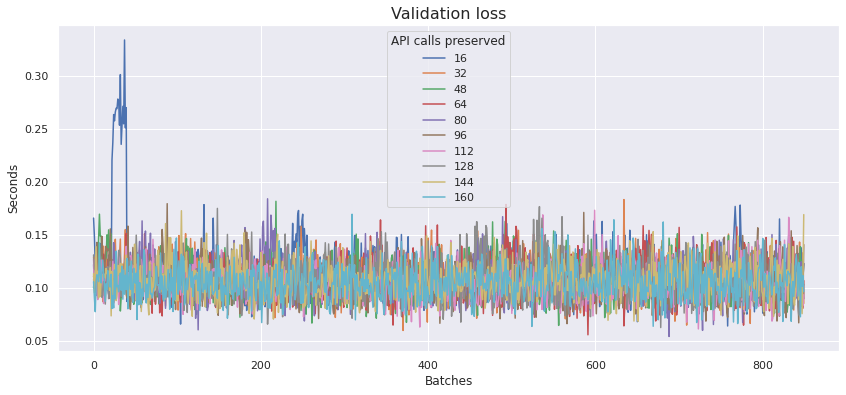

In [8]:
ax = plot_lists([val_loss[x][50:] for x in val_loss.keys()], 
                legend_title=legend_title,
                legend=list(val_loss.keys()))
ax.set_title("Validation loss", fontsize=16)
ax.set_xlabel("Batches")
_ = ax.set_ylabel("Seconds")

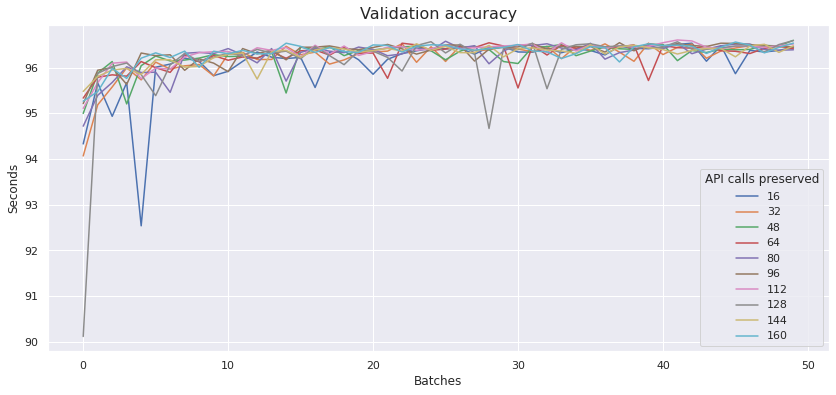

In [9]:
ax = plot_lists([val_metrics[x][:,0] for x in val_metrics.keys()], 
                legend_title=legend_title,
                legend=list(val_metrics.keys()))
ax.set_title("Validation accuracy", fontsize=16)
ax.set_xlabel("Batches")
_ = ax.set_ylabel("Seconds")

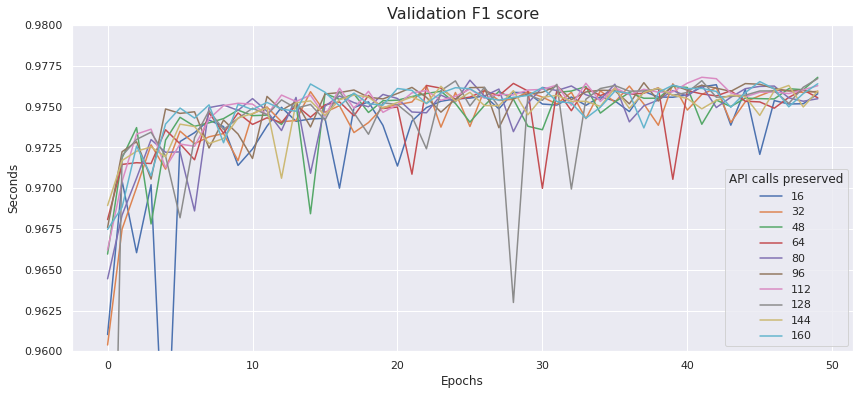

In [14]:
ax = plot_lists([val_metrics[x][:,1] for x in val_metrics.keys()], 
                legend_title=legend_title,
                legend=list(val_metrics.keys()))
ax.set_title("Validation F1 score", fontsize=16)
ax.set_xlabel("Epochs")
ax.set_ylim([0.96, 0.98])
_ = ax.set_ylabel("Seconds")

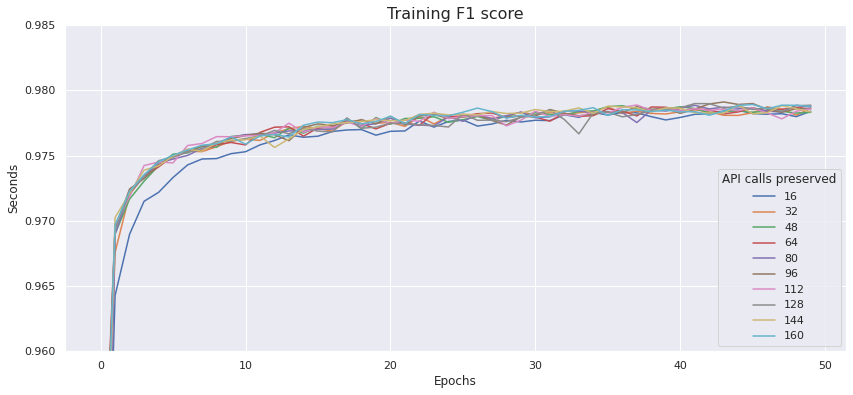

In [15]:
ax = plot_lists([train_metrics[x][:,1] for x in train_metrics.keys()], 
                legend_title=legend_title,
                legend=list(train_metrics.keys()))
ax.set_title("Training F1 score", fontsize=16)
ax.set_xlabel("Epochs")
ax.set_ylim([0.96, 0.985])
_ = ax.set_ylabel("Seconds")

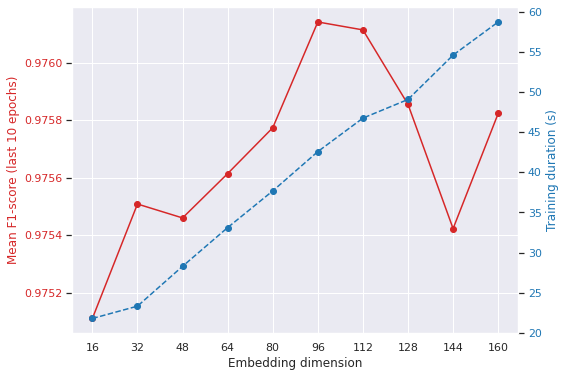

In [17]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_xlabel("Embedding dimension", fontsize=12)

# 1st plot
df = pd.DataFrame([val_metrics[x][:,1] for x in val_metrics.keys()],
                    index=val_metrics.keys())
mean_f1_last10epochs = df[list(range(40,49))].mean(axis=1)

color = "tab:red" # "tab:orange"
ax1.plot(mean_f1_last10epochs, color=color)
ax1.scatter(x=mean_f1_last10epochs.index, y=mean_f1_last10epochs.values, color=color)
ax1.set_ylabel("Mean F1-score (last 10 epochs)", color=color, fontsize=12)
ax1.tick_params(axis="y", labelcolor=color)

# 2nd plot
duration_mean = pd.DataFrame(duration).transpose()[list(range(15,49))].mean(axis=1)

ax2 = ax1.twinx()
color = "tab:blue"
ax2.plot(duration_mean, "--", color=color)
ax2.scatter(x=duration_mean.index, y=duration_mean.values, color=color)
ax2.set_ylabel("Training duration (s)", color=color, fontsize=12)
ax2.tick_params(axis="y", labelcolor=color)

ax2.grid(False)